<a href="https://colab.research.google.com/github/Sbu97/AI_in_built_environments_sbusiso_IAAC2024_tutorials_/blob/main/Sbusiso_Bhembe_quickstarts/02_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/quickstarts/02_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

In [1]:
!pip install osmnx geopy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 2.1 MB/s eta 0:00:00


In [2]:
import geopandas
import matplotlib.pyplot as plt
import osmnx
import seaborn as sns
from shapely.geometry import Point, LineString

sns.set_style(style="dark")

### 🕸 Street network

In [28]:
PLACE_NAME = "les corts, Barcelona, Spain"
graph = osmnx.graph_from_place(PLACE_NAME)

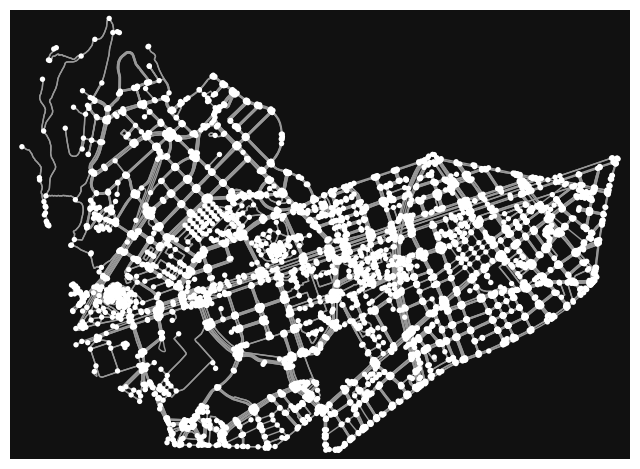

In [29]:
# showing our street network

figure, ax = osmnx.plot_graph(graph)

### 🕍 Building footprints

We can retrieve places information as well (buildings, parks, amenities etc). The data that we retrieve is a dataframe, like the ones we worked with during the previous term:

In [30]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)

buildings.head()

<ipython-input-30-25295188f309>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = osmnx.geometries_from_place(


geometry  \
element_type osmid                                                           
node         2629932730                           POINT (2.13657 41.38750)   
             5372082832                           POINT (2.13385 41.38460)   
             8265818805                           POINT (2.12815 41.38467)   
way          35814815    POLYGON ((2.11888 41.38431, 2.11969 41.38451, ...   
             36335613    POLYGON ((2.11888 41.38443, 2.11918 41.38451, ...   

                        addr:housenumber                         addr:street  \
element_type osmid                                                             
node         2629932730              292             Travessera de les Corts   
             5372082832              NaN                                 NaN   
             8265818805               33  Carrer de Dolors Masferrer i Bosch   
way          35814815                NaN          Carrer de Martí i Franquès   
             36335613                NaN      Carrer de Lluís Solé i Sabarís   

                         addr:city addr:country addr:postcode     branch  \
element_type osmid                                                         
node         2629932730  Barcelona           ES         08029  Les Corts   
             5372082832        NaN          NaN           NaN        NaN   
             8265818805  BARCELONA          NaN         08028        NaN   
way          35814815    Barcelona          NaN           NaN        NaN   
             36335613    Barcelona          NaN         08028        NaN   

                           building                     email  \
element_type osmid                                              
node         2629932730         yes  nhlescorts@nh-hotels.com   
             5372082832       kiosk                       NaN   
             8265818805      public                       NaN   
way          35814815           yes                       NaN   
             36335613    university        info@ictja.csic.es   

                                                     name  ... short_name  \
element_type osmid                                         ...              
node         2629932730                      NH Les Corts  ...        NaN   
             5372082832                  Churrería Montse  ...        NaN   
             8265818805                          Rocòdrom  ...        NaN   
way          35814815    Facultat de Ciències de la Terra  ...        NaN   
             36335613               Geociencies Barcelona  ...        NaN   

                         fax alt_name:ca  bar payment:credit_cards  \
element_type osmid                                                   
node         2629932730  NaN         NaN  NaN                  NaN   
             5372082832  NaN         NaN  NaN                  NaN   
             8265818805  NaN         NaN  NaN                  NaN   
way          35814815    NaN         NaN  NaN                  NaN   
             36335613    NaN         NaN  NaN                  NaN   

                        payment:debit_cards reservation not:name  \
element_type osmid                                                 
node         2629932730                 NaN         NaN      NaN   
             5372082832                 NaN         NaN      NaN   
             8265818805                 NaN         NaN      NaN   
way          35814815                   NaN         NaN      NaN   
             36335613                   NaN         NaN      NaN   

                        brand:wikipedia payment:cash  
element_type osmid                                    
node         2629932730             NaN          NaN  
             5372082832             NaN          NaN  
             8265818805             NaN          NaN  
way          35814815               NaN          NaN  
             36335613               NaN          NaN  

[5 rows x 143 columns]

<Axes: >

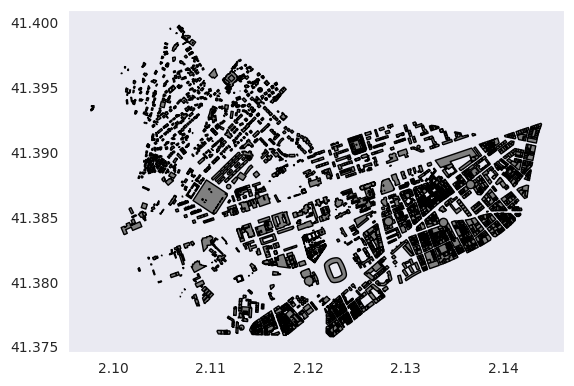

In [32]:
buildings.plot(color="grey", edgecolor="black")

### 🍽 Other data extraction

There is a lot more data that can be extracted, like parks, amenities and more! See the entire list [here](https://wiki.openstreetmap.org/wiki/Map_features).

In [33]:
college = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "college"
    }
)
college.head()

<ipython-input-33-1c2ad9d622bb>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  college = osmnx.geometries_from_place(


addr:housenumber                addr:street  amenity  \
element_type osmid                                                              
node         6236811361               491          Avinguda Diagonal  college   
             10108728701               11           Carrer de Berlín  college   
way          761059106                 20  Carrer de Mejía Lequerica  college   

                                             name  \
element_type osmid                                  
node         6236811361       Fomento Profesional   
             10108728701  CIM Formación Barcelona   
way          761059106              Pavelló Xaloc   

                                                                   geometry  \
element_type osmid                                                            
node         6236811361                            POINT (2.14335 41.39204)   
             10108728701                           POINT (2.13701 41.38249)   
way          761059106    POLYGON ((2.12558 41.38325, 2.12554 41.38331, ...   

                          addr:city addr:postcode internet_access  \
element_type osmid                                                  
node         6236811361         NaN           NaN             NaN   
             10108728701  Barcelona         08014             yes   
way          761059106    Barcelona         08022             yes   

                         internet_access:fee                 name:ca  \
element_type osmid                                                     
node         6236811361                  NaN                     NaN   
             10108728701                  no  CIM Formació Barcelona   
way          761059106             customers           Pavelló Xaloc   

                                phone  \
element_type osmid                      
node         6236811361           NaN   
             10108728701  934 510 909   
way          761059106            NaN   

                                                                    website  \
element_type osmid                                                            
node         6236811361                                                 NaN   
             10108728701   https://www.cimformacion.com/centros/barcelona/3   
way          761059106    https://www.diba.cat/web/recintes/maternitat/p...   

                         wheelchair  \
element_type osmid                    
node         6236811361         NaN   
             10108728701        yes   
way          761059106          yes   

                                                                      nodes  \
element_type osmid                                                            
node         6236811361                                                 NaN   
             10108728701                                                NaN   
way          761059106    [7110443484, 7110443454, 7110569087, 158673119...   

                         building  \
element_type osmid                  
node         6236811361       NaN   
             10108728701      NaN   
way          761059106        yes   

                                                                      image  \
element_type osmid                                                            
node         6236811361                                                 NaN   
             10108728701                                                NaN   
way          761059106    https://www.diba.cat/documents/99363101/365038...   

                                        operator operator:type  
element_type osmid                                              
node         6236811361                      NaN           NaN  
             10108728701                     NaN           NaN  
way          761059106    Diputació de Barcelona        public

### 🎢 Putting it all together in one map

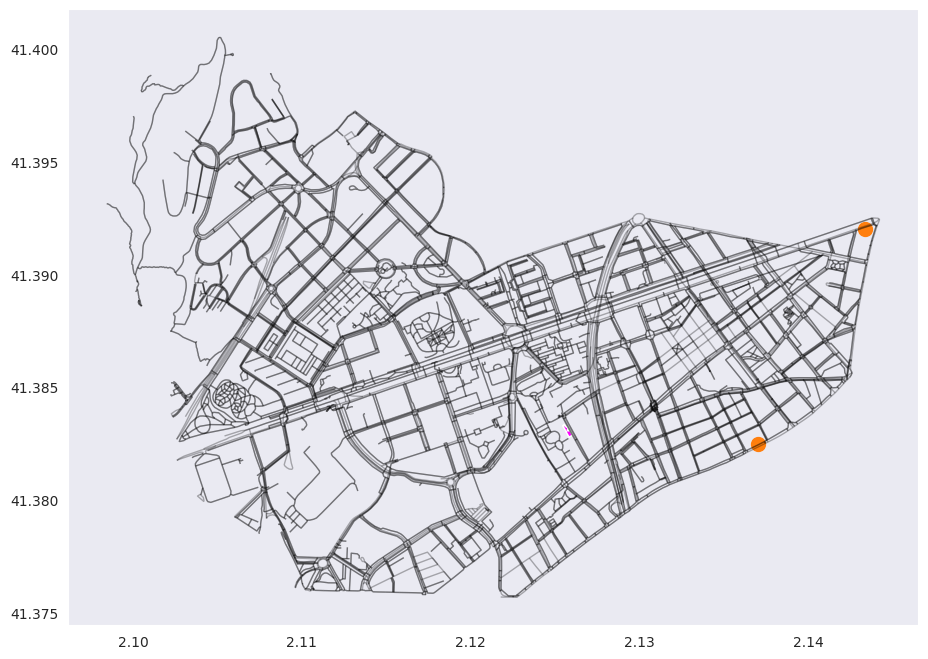

In [34]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
college.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot college
college.plot(ax=ax, facecolor="magenta", markersize=100)

plt.show()

### 📍Mapping our own place

There are several ways to map our place on the map:

1. placing a point when we know the exact coordinates
2. finding place's coordinates via [geocoding](https://nominatim.org/)

#### 📍Placing a point by its coordinates

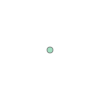

In [35]:
coords = (2.12278 ,41.38089)
p = Point(coords)
p

In [36]:
print(p.x, p.y)

2.12278 41.38089


In [37]:
geom = geopandas.GeoDataFrame(
    {
        "geometry": [p],
    },
    crs=edges.crs
)

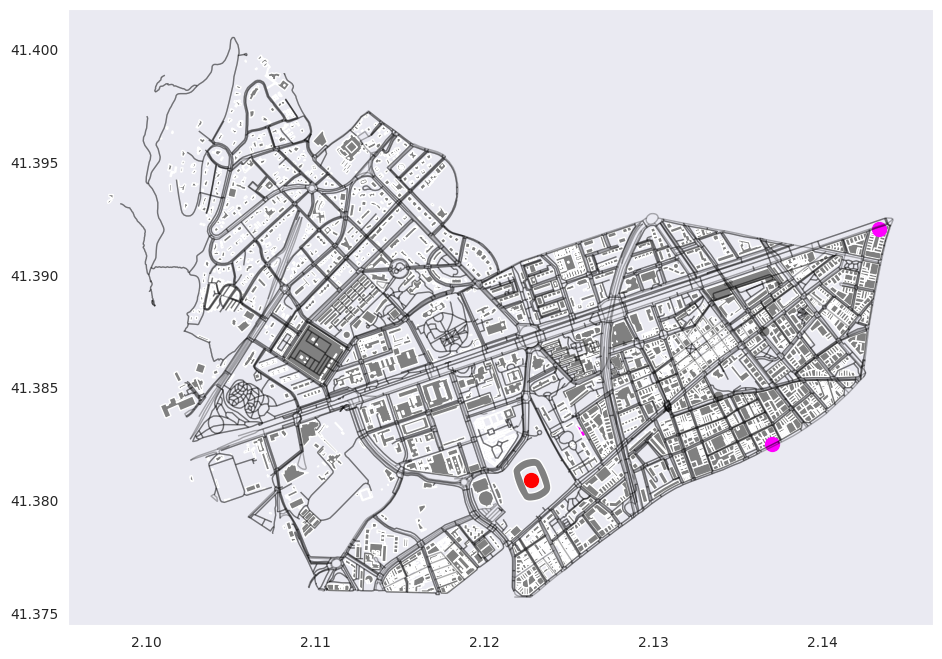

In [55]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="grey")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot college
college.plot(ax=ax, color="magenta", markersize=100)

# Plot camp nou
geom.plot(ax=ax, color="red", markersize=100)


plt.show()

#### ㊙️ Geocoding: name to coordinates

In [56]:
our_place = "Spotify Camp Nou"  # "Camp Nou"
geocoded_addresses = geopandas.tools.geocode(
    [our_place],
    provider="nominatim",
    user_agent="autogis2023",
    timeout=10
)
geocoded_addresses.head()

geometry                                            address
0  POINT (2.12282 41.38088)  Spotify Camp Nou, Avinguda de Joan XXIII, Sant...

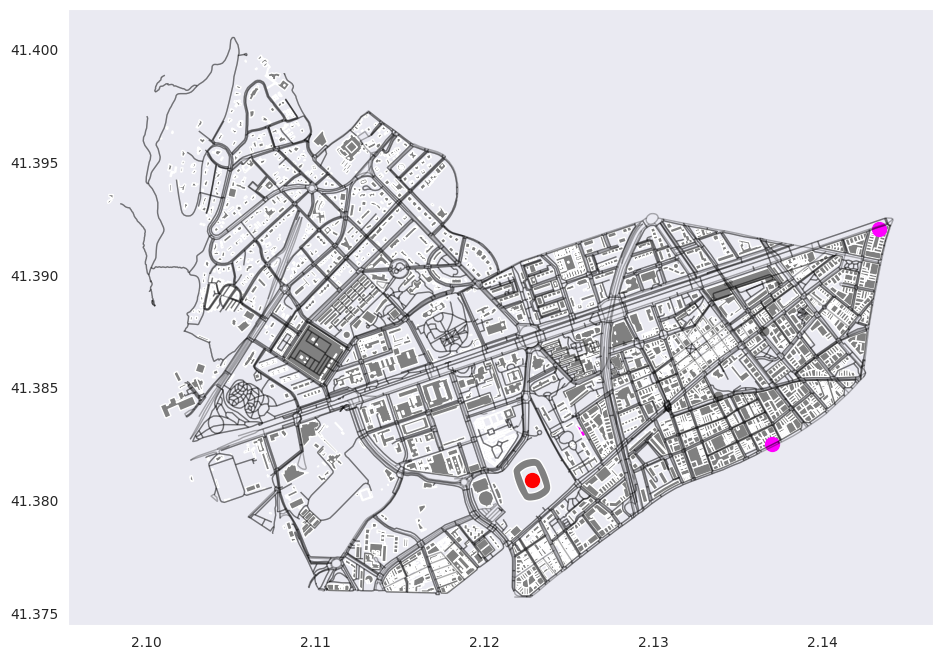

In [58]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="grey")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot college
college.plot(ax=ax, color="magenta", markersize=100)

# Plot Camp Nou
geocoded_addresses.plot(ax=ax, color="red", markersize=100)


plt.show()

### 📐 Geometrical operations

A list of possible geometrical operations can be found in [shapely documentation](https://shapely.readthedocs.io/en/stable/geometry.html).

Let's check how many restaurants lie within 4 minutes fast walk (0.5 km). 1km is around 0.008 degrees

In [59]:
rad = p.buffer(0.008 * 3)  # making offset of 1.5 km from our point of interest

rad = geopandas.GeoDataFrame(
    {
        "geometry": [rad],
    },
    crs=buildings.crs
)

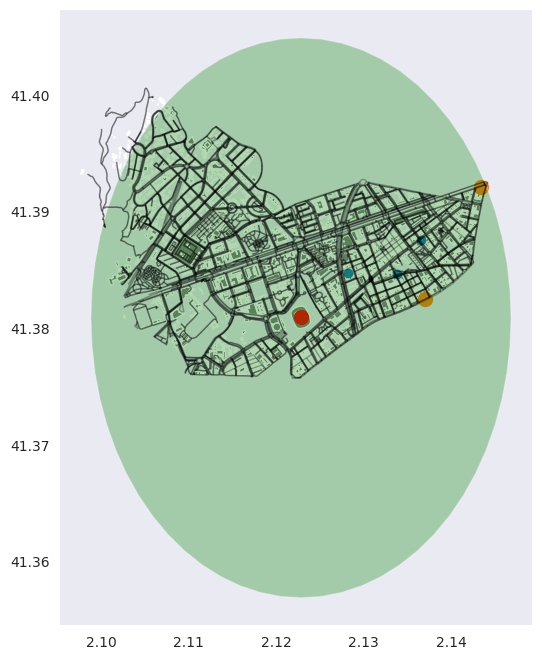

In [60]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="grey")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
college.plot(ax=ax, facecolor="magenta", markersize=100)

# Plot camp nou
geocoded_addresses.plot(ax=ax, color="red", markersize=100)
rad.plot(ax=ax, linewidth=1, color="green", alpha=0.3)

plt.show()

In [61]:
accessible_college = [r for r in college["geometry"] if isinstance(r, Point) and r.within(rad["geometry"][0])]
accessible_college = rad = geopandas.GeoDataFrame(
    {
        "geometry": accessible_college,
    },
    crs=buildings.crs
)

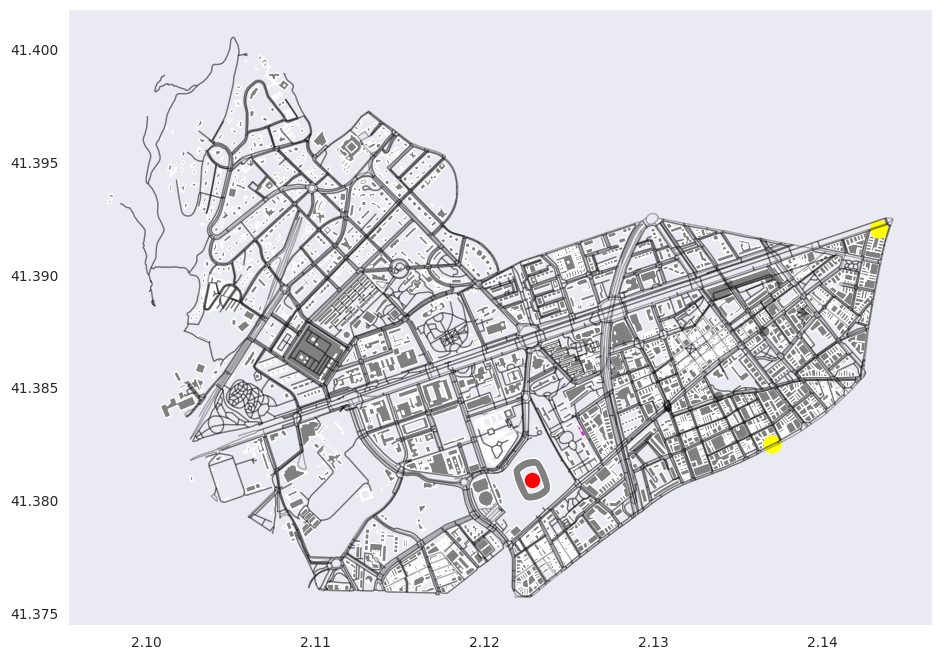

In [63]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="grey")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
college.plot(ax=ax, color="magenta", markersize=100, alpha=0.7)

# Plot camp nou
geocoded_addresses.plot(ax=ax, color="red", markersize=100)
rad.plot(ax=ax, linewidth=1, color="green", alpha=0.3)

accessible_college.plot(ax=ax, facecolor="yellow", markersize=150, alpha=1.0)

plt.show()

### 🕸 Network Analysis

With osmnx we can get statistics necessary for urban analysis within a defined area. Let's define our area as a polygon:

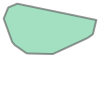

In [64]:
zone = edges.unary_union.convex_hull
zone

In [65]:
stats = osmnx.basic_stats(graph, area=zone.area)
stats

{'n': 5196,
 'm': 14881,
 'k_avg': 5.727867590454196,
 'edge_length_total': 517529.76599999855,
 'edge_length_avg': 34.777888985955144,
 'streets_per_node_avg': 3.2806004618937643,
 'streets_per_node_counts': {0: 0,
  1: 286,
  2: 14,
  3: 2893,
  4: 1963,
  5: 39,
  6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.0550423402617398,
  2: 0.0026943802925327174,
  3: 0.556774441878368,
  4: 0.37779060816012316,
  5: 0.007505773672055427,
  6: 0.00019245573518090838},
 'intersection_count': 4910,
 'street_length_total': 297463.3929999996,
 'street_segment_count': 8395,
 'street_length_avg': 35.43339999999995,
 'circuity_avg': 1.0380225015874165,
 'self_loop_proportion': 0.0011911852293031567,
 'node_density_km': 6654960801689.166,
 'intersection_density_km': 6288656184814.05,
 'edge_density_km': 662844554741600.6,
 'street_density_km': 380986762962366.56}

What do these stats mean?

[Link](https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.stats)

#### 〽️ Shortest route

In [75]:
origin = (
    osmnx.geocode_to_gdf("Spotify Camp Nou")  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    osmnx.geocode_to_gdf("Edifici Xaloc")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

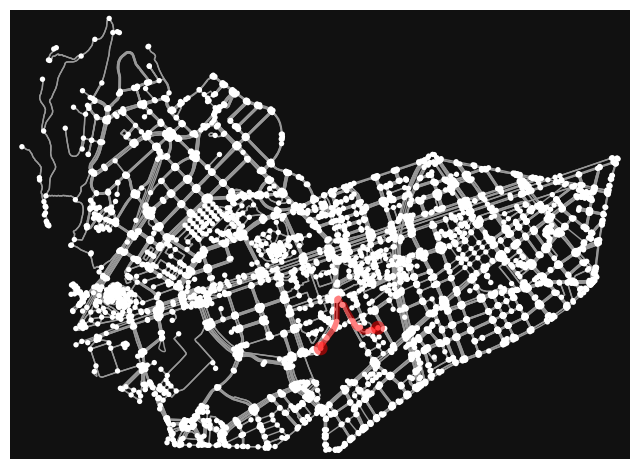

In [67]:
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)

# calculating the shortest path:
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)

# plotting the projection
fig, ax = osmnx.plot_graph_route(graph, route)

In [76]:
route_nodes = nodes.loc[route]
route_line = LineString(
    list(route_nodes.geometry.values)
)
route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom.length

<ipython-input-76-3f1016416ab9>:14: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  route_geom.length


0    0.007417
dtype: float64

### 🕸 Walkability analysis

How far can you reach from a place on foot?

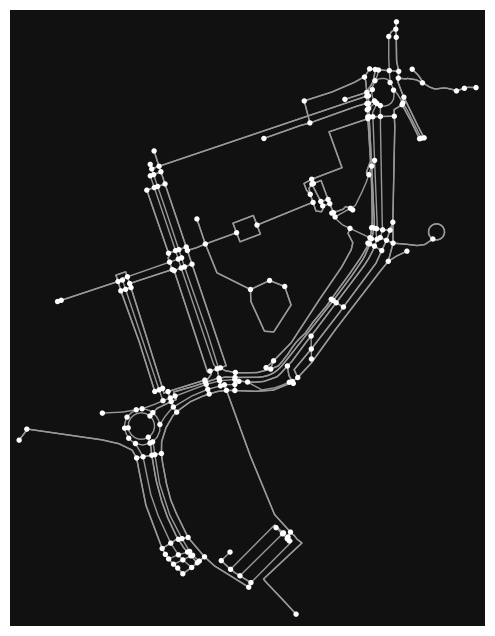

In [77]:
# getting camp nou from the graph:
camp_nou_node = osmnx.distance.nearest_nodes(graph, p.x, p.y, return_dist=False)

# cutting the graph to hold 1km distance from the node only:
g = osmnx.truncate.truncate_graph_dist(graph, camp_nou_node, max_dist=500)
figure, ax = osmnx.plot_graph(g)


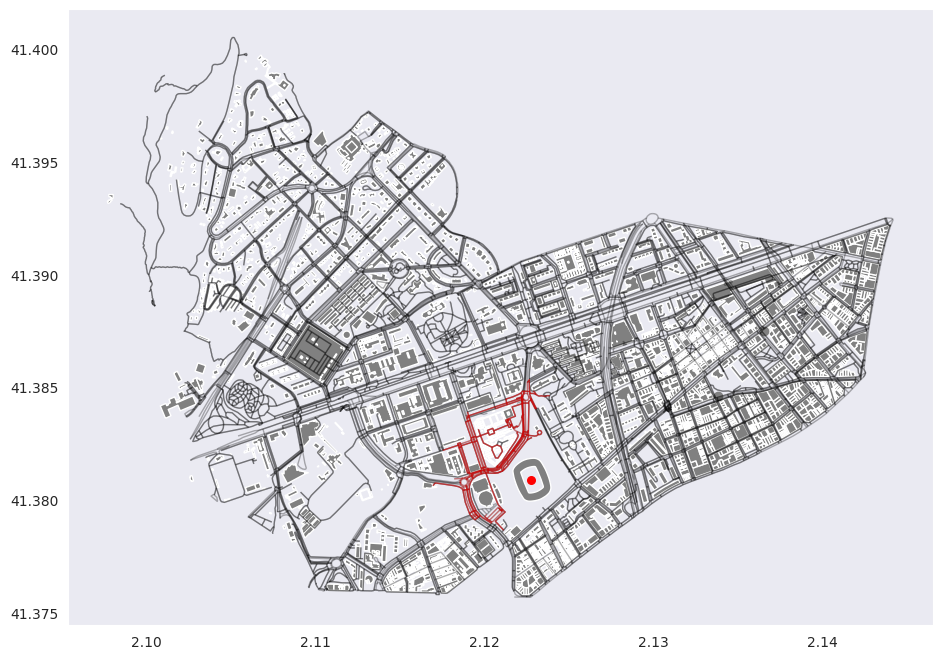

In [78]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="grey")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)
plt.show()

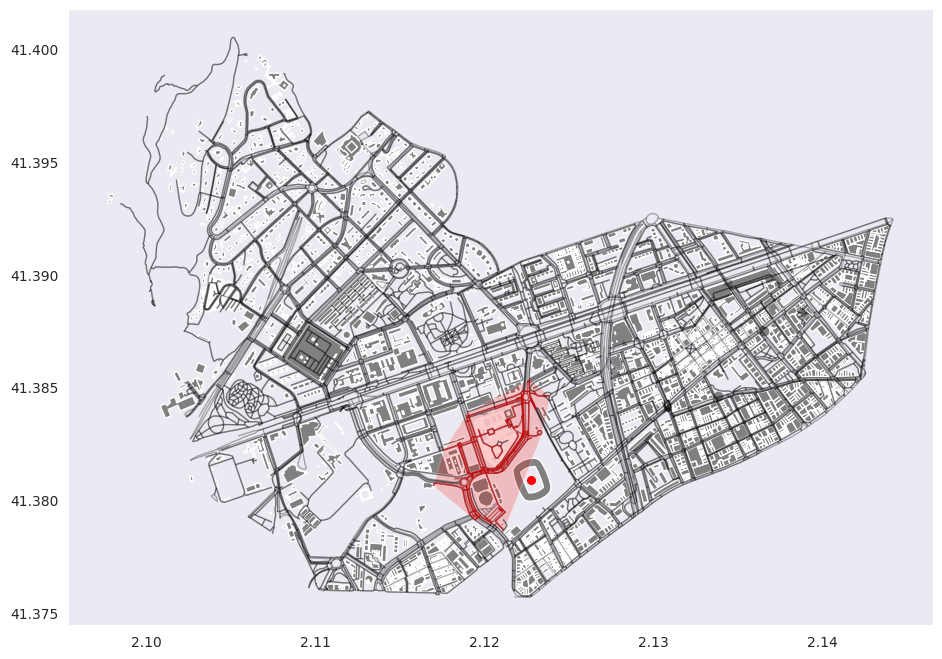

In [79]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, color="grey")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)

walkable_zone = edges1.unary_union.convex_hull

w_zone_mapped = geopandas.GeoDataFrame(
    {
        "geometry": [walkable_zone],
    },
    crs=buildings.crs
)

w_zone_mapped.plot(ax=ax, facecolor="red", alpha=0.2)


plt.show()

### 🧬 Resources

* [Downloading data for entire countries / continents](https://download.geofabrik.de/)
* [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html)
* [OSMNX](https://osmnx.readthedocs.io/en/stable/user-reference.html)
* [shapely](https://shapely.readthedocs.io/en/stable/geometry.html)

This notebook is based on the material from [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html) from [University of Helsinki](https://www.helsinki.fi/sv) by Henrikki Tenkanen, Vuokko Heikinheimo and Håvard Wallin Aagesen.

Materials taken from the course belong mostly to the [Lesson 3 Geocoding](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding.html) and [Lesson 6 Retrieving data from OSM and Network Analysis](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-6/overview.html). Material was adapted for the purposes of this course by changing the location in the example as well as adding calculation of walking distance from a given point.


Thanks to them for maintaining [the course repo](https://github.com/Automating-GIS-processes/site/) and improving the material from year to year.